In [80]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('/content/sample_data/Advertising dataset.csv')

In [82]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data= data.astype('float32')

In [84]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.100006,37.799999,69.199997,22.1
1,44.500000,39.299999,45.099998,10.4
2,17.200001,45.900002,69.300003,9.3
3,151.500000,41.299999,58.500000,18.5
4,180.800003,10.800000,58.400002,12.9


In [85]:
x = data.drop('Sales',axis=1)
y = data['Sales']

In [86]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [87]:
y_test

144    11.400000
157    10.100000
32      9.600000
98     25.400000
163    18.000000
78      5.300000
91      7.300000
170     8.400000
124    19.700001
75      8.700000
189     6.700000
176    20.200001
104    20.700001
20     18.000000
87     16.000000
46     10.600000
128    24.700001
36     25.400000
135    11.600000
12      9.200000
194    17.299999
92     19.400000
142    20.100000
160    14.400000
50     11.400000
199    13.400000
73     11.000000
166     8.000000
41     17.100000
30     21.400000
161    13.300000
3      18.500000
66      9.500000
180    10.500000
191     9.900000
13      9.700000
99     17.200001
153    19.000000
6      11.800000
158     7.300000
Name: Sales, dtype: float32

In [88]:
x_train.head()
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)


In [104]:
tf.random.set_seed(22)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None,32,3)),

    tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(128, activation = 'leaky_relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

     tf.keras.layers.Dense(64, activation = 'leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),

    tf.keras.layers.Dense(1, activation = 'leaky_relu')
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Lion(learning_rate=0.001))

In [105]:
model.fit(x_train,y_train,epochs=300, verbose=0, validation_data=(x_test,y_test))

In [106]:
loss = model.evaluate(x_test,y_test)
loss

2/2 [==============================] - 0s 9ms/step - loss: 2.3657


2.3656790256500244

In [107]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
training_results = model.fit(x_train, y_train, epochs =100, verbose = 0, validation_data=(x_test, y_test), callbacks=[early_stopping])

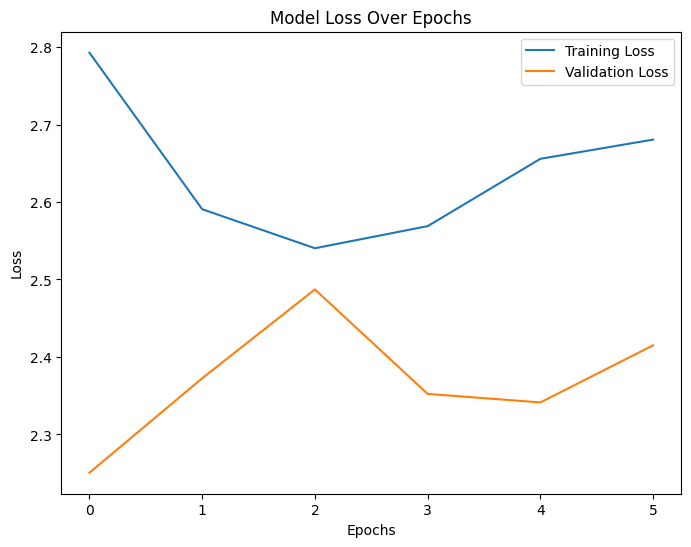

In [108]:
plt.figure(figsize=(8,6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()